# Time Series with Pandas

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
sns.set()

### Datetime

In [2]:
year = 2020
month = 7
day = 12
hour = 8
minute = 15
second = 30
date = datetime(year, month, day, hour, minute, second)
date

datetime.datetime(2020, 7, 12, 8, 15, 30)

In [3]:
type(date)

datetime.datetime

In [4]:
# Convert datetime objects to indices
first_two = [datetime(2017,1,1), datetime(2015,1,2)]
dt_ind = pd.DatetimeIndex(first_two)

In [5]:
data = np.random.randn(2,2)
cols = ['a', 'b']
df = pd.DataFrame(data, dt_ind, cols)
df

,a,b
2017-01-01,-1.339349,1.009783
2015-01-02,0.790134,1.575856


In [6]:
# Position of index of the maximum
df.index.argmax()

0

In [7]:
# Index of the maximum
df.index.max()

Timestamp('2017-01-01 00:00:00')

In [8]:
# Position of index of the minimum
df.index.argmin()

1

In [9]:
# Index of minimum
df.index.min()

Timestamp('2015-01-02 00:00:00')

### Time Resampling

In [12]:
df = pd.read_csv('../sample-files/walmart-stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [16]:
# Convert date column in string to Datetime object
df['Date'] = pd.to_datetime(df['Date'])
# Another syntax
# df['Date'] = df['Date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [17]:
# Set the Datetime object column as the index
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [20]:
# Set the index to be the date columns 
df1 = pd.read_csv('../sample-files/walmart-stock.csv', index_col='Date', parse_dates=True)
df1

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [23]:
# Set a rule specific to time series data for resample
df.resample(rule='Q').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [24]:
# Apply custom functions to the aggregates
df.resample(rule='A').apply(lambda x: x[0])

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


<AxesSubplot:xlabel='Date'>

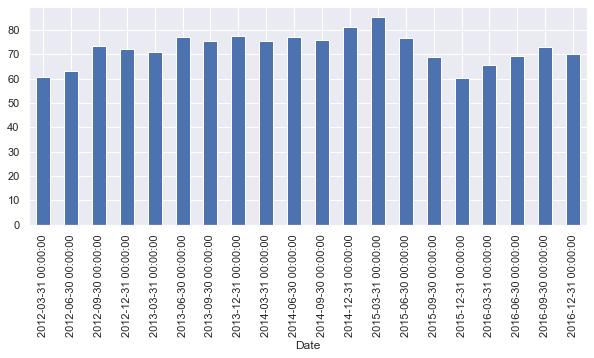

In [31]:
# Visualization
df['Close'].resample('Q').mean().plot(kind='bar', figsize=(10,4))

### Time Shifts

In [34]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [45]:
# Shift data upwards
df.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [44]:
# Shift data downwards
df.shift(periods=-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Shift data based on frequency
df.shift(freq='Q').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-03-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-03-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-03-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-03-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


### Rolling & Expanding

<AxesSubplot:xlabel='Date'>

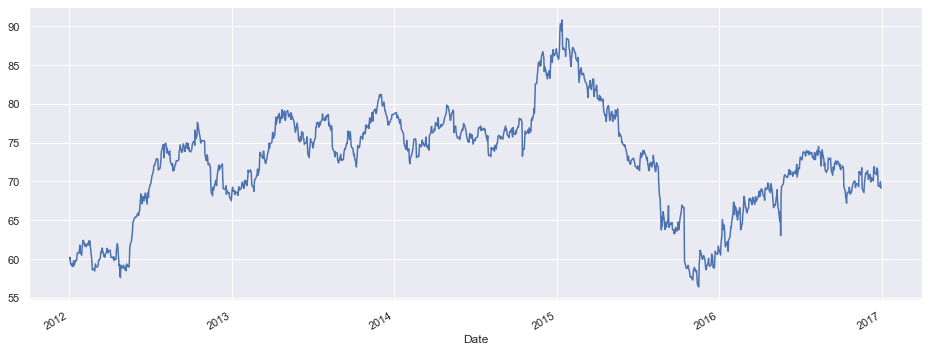

In [50]:
df['Open'].plot(figsize=(16,6))

In [51]:
# Calculate the moving average/rolling mean in a 7-day window
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

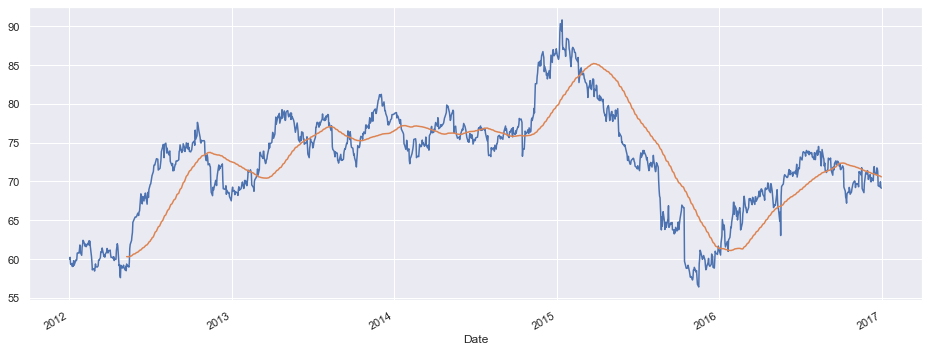

In [55]:
# Comparison plot using rolling mean and the original data
df['Open'].plot()
df.rolling(window=90).mean()['Close'].plot(figsize=(16,6))

<AxesSubplot:>

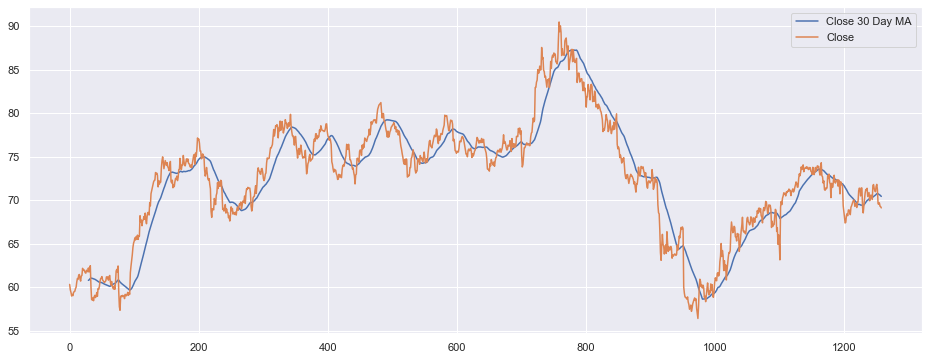

In [60]:
# Setting legned
df = pd.read_csv('../sample-files/walmart-stock.csv')
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day MA', 'Close']].plot(figsize=(16,6))

<AxesSubplot:>

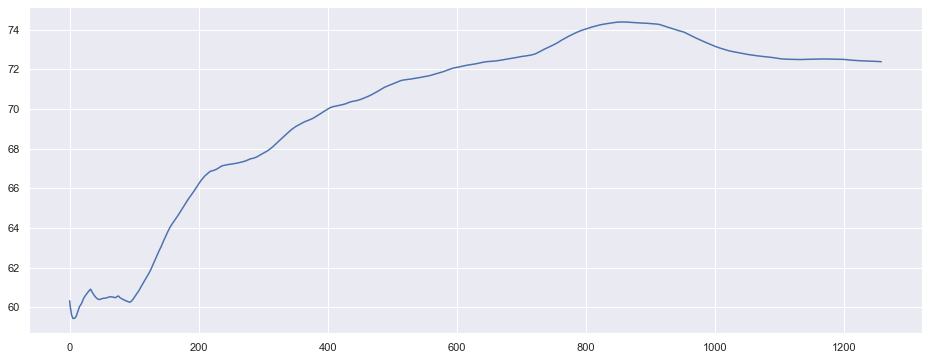

In [61]:
# Expanding: taking everything from the start of the series to this point into account
# Average of points that came before at each point in the series
df['Close'].expanding().mean().plot(figsize=(16,6))

### Bollinger Bands
Bollinger bands are volitility bands placed below and above the moving average.
The volitility is based on the standard deviation.
The bands will automatically widen when volatility increases and narrow as it decreases. 

<AxesSubplot:>

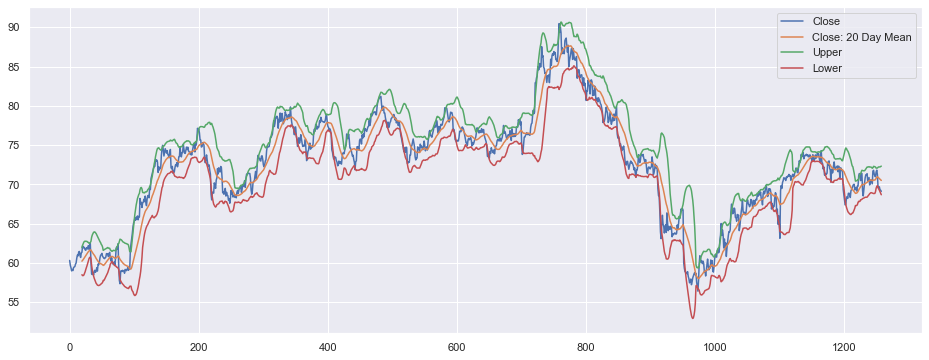

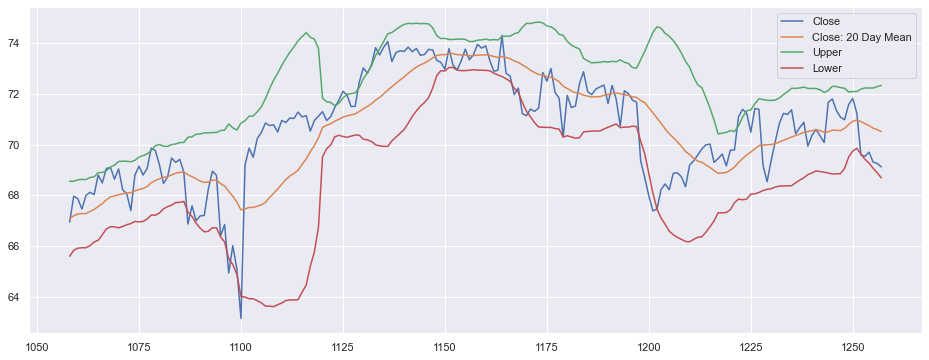

In [64]:
# Creating the moving average and bands
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()
# Upper band = 20 MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())
# Lower band = 20 MA = 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())
# Plot the bollinger bands
df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))                                            
# Indexing the data and plot
df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].tail(200).plot(figsize=(16,6))                                            